## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import tensorflow as tf
tf.set_random_seed(42)

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
#Before reshape the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
""

''

### Find dimensions of an image in the dataset

label for each of the below image: 0


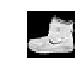

In [5]:
import numpy as np
# visualizing the first image in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1)) #width 10, height 1

plt.subplot(1, 10, 1)
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.axis('off')
print('label for each of the below image: %s' % (np.argmax(y_train[0:10][1])))
plt.show()

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
# Train Label = y_train 
# Test Label = y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Normalize both the train and test image data from 0-255 to 0-1

In [7]:
# # normalize inputs from 0-255 to 0-1. scale data to the range of [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
#Before applying reshape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [9]:
#x_train = x_train.reshape(60000, 784)
#print(x_train.shape)
#x_test = x_test.reshape(10000, 784)
#print(x_test.shape)

In [10]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras import regularizers
#from keras import optimizers
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(33, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
# Add Flatten before passing the feature map into 2 fully connected layers
model.add(Flatten())
#Hidden layers
model.add(Dense(128, activation='relu', name='Layer_1'))
model.add(Dense(10, activation='softmax', name='Layer_2'))



Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 33)        9537      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 33)        132       
_________________________________________________________________
flatten_1 (Flatten)          (None, 19008)             0         
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               2433152   
_________________________________________________________________
Layer_2 (Dense)              (None, 10)                1290      
Total para

In [16]:
#Train the model
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 487s 8ms/step - loss: 0.4305 - acc: 0.8548 - val_loss: 0.3477 - val_acc: 0.8810
Epoch 2/10
60000/60000 [==============================] - 490s 8ms/step - loss: 0.2568 - acc: 0.9059 - val_loss: 0.2941 - val_acc: 0.8964
Epoch 3/10
60000/60000 [==============================] - 487s 8ms/step - loss: 0.1994 - acc: 0.9267 - val_loss: 0.4169 - val_acc: 0.8744
Epoch 4/10
60000/60000 [==============================] - 488s 8ms/step - loss: 0.1549 - acc: 0.9422 - val_loss: 0.3398 - val_acc: 0.9062
Epoch 5/10
60000/60000 [==============================] - 476s 8ms/step - loss: 0.1216 - acc: 0.9555 - val_loss: 0.3232 - val_acc: 0.9051
Epoch 6/10
60000/60000 [==============================] - 479s 8ms/step - loss: 0.0933 - acc: 0.9662 - val_loss: 0.3451 - val_acc: 0.9023
Epoch 7/10
60000/60000 [==============================] - 481s 8ms/step - 

## Insights with Early stopping

### The model accuracy is 97.19% with the loss 0.0781

### Validation Accuracy is 90.48%

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(33, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
# Add MaxPooling2D and Dropput after the convolution layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Hidden layers
model.add(Dense(128, activation='relu', name='Layer_1'))
model.add(Dense(10, activation='softmax', name='Layer_2'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compile the Model and Train the model 

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 33)        9537      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 33)        132       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 33)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 33)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4752)              0         
__________

In [21]:
#Train the model
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 418s 7ms/step - loss: 0.3866 - acc: 0.8641 - val_loss: 0.3110 - val_acc: 0.8867
Epoch 2/10
60000/60000 [==============================] - 415s 7ms/step - loss: 0.2581 - acc: 0.9041 - val_loss: 0.2980 - val_acc: 0.8927
Epoch 3/10
60000/60000 [==============================] - 420s 7ms/step - loss: 0.2152 - acc: 0.9211 - val_loss: 0.2571 - val_acc: 0.9079
Epoch 4/10
60000/60000 [==============================] - 420s 7ms/step - loss: 0.1840 - acc: 0.9308 - val_loss: 0.2575 - val_acc: 0.9119
Epoch 5/10
60000/60000 [==============================] - 419s 7ms/step - loss: 0.1638 - acc: 0.9382 - val_loss: 0.2967 - val_acc: 0.8971
Epoch 6/10
60000/60000 [==============================] - 420s 7ms/step - loss: 0.1425 - acc: 0.9470 - val_loss: 0.2570 - val_acc: 0.9156
Epoch 7/10
60000/60000 [==============================] - 424s 7ms/step - loss: 0.1239 - acc: 0.9536 - val_loss: 0.2640 - 

## Insights

### The model accuracy is 96.72% with the loss 0.0921

### Validation Accuracy is 91.97%

In [24]:
scores = model.evaluate(x_test, y_test)
print('accuracy: ',scores[1]*100)
print('loss: ',scores[0])
#scores[1]*100

10000/10000 [==============================] - 16s 2ms/step
accuracy:  91.97
loss:  0.28379954916238787
